#Praktikum 3 DATA MINING


###1. PCA

**Import Packagenya**
kita lakukan import package terlebih dahulu

In [ ]:
import matplotlib.pyplot as plt   #ini librrary untuk melakukan plot nantinya
%matplotlib inline
import numpy as np                #ini untuk perhitungan nantinya
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Import dataset**

In [ ]:
import pandas as pd #mengimport dataset kita
from sklearn.preprocessing import StandardScaler
TT_df = pd.read_csv('/content/HarryPotterTT.csv')
TT_df

,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7
5,'Prof. McGonagail',95,19,29,76,5
6,'Prof. Moody',82,20,35,69,5
7,'Rubeus Hagrid',12,11,30,8,7
8,'Fred Weasley',87,13,30,22,4
9,'George Weasley',87,13,30,22,4


**Ekstak data**

melakukan ekstrak data ke dalam array numpy x dan skala datanya

In [ ]:
y = TT_df.pop('Name').values
X = TT_df.values
X_scal = StandardScaler().fit_transform(X)
X.shape

(22, 5)

**Apply PCA**


In [ ]:
pcaHP = PCA(n_components=4)
X_r = pcaHP.fit(X_scal).transform(X_scal)
pcaHP.explained_variance_ratio_

array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

Ada lima fitur yang diproyeksikan ke 4 PC sehingga matriks proyeksinya adalah 4 x 5 dengan code berikut:

In [ ]:
pcaHP.components_

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

**Plot ke 4 varian PC**

Kita buat pemroyeksi dataframe plot ke dalam 4 pc tadi

(0.0, 0.8)

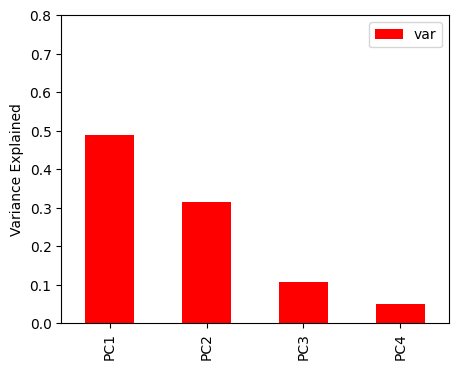

In [ ]:
df = pd.DataFrame(pcaHP.explained_variance_ratio_,
                  index = ['PC1', 'PC2', 'PC3', 'PC4'], columns = ['var'])
pl = df.plot.bar(color = 'red', figsize = (5,4))
pl.set_ylabel("Variance Explained")
pl.set_ylim([0,0.8])

dapat dilihat dalam grafik berikut, renang variansi explained dengan rataan tertinggi didapat pada PC 1 dan terendah ada pada PC4.

**Plot persebaran data dengan PC1 dan PC2**

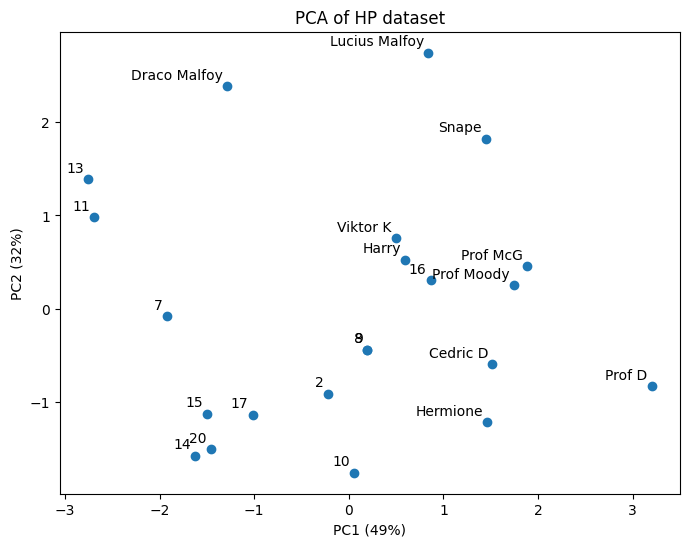

In [ ]:
plt.figure(figsize = (8,6))         #ini untuk ukuran plotnya
lw = 2
labels = list(range(len(y)))
labels[0]='Harry'
labels[1]='Hermione'
labels[3]='Prof D'
labels[5]='Prof McG'
labels[6]='Prof Moody'
labels[18]='Cedric D'
labels[19]='Viktor K'
labels[21]='Lucius Malfoy'
labels[4]='Snape'
labels[12]='Draco Malfoy'

plt.scatter(X_r[:, 0], X_r[:, 1])

for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
  plt.annotate(
      label,
      xy=(xi,yi), xytext = (-3,3),
      textcoords = 'offset points', ha = 'right', va='bottom')

plt.xlabel('PC1 (49%)')
plt.ylabel('PC2 (32%)')
plt.title('PCA of HP dataset')

plt.show()

Plot ini menunjukkan data yang diproyeksikan ke 2 PC pertama. PC ini
menyumbang 81% varian data(dari kedua PC tersebut). Dapat dikatakan bahwa PC pertama
mencerminkan competence dan PC kedua mewakili malevolence.